# Exploring Why Civil Resistance Works
---

> Gaganis Michail, Pregraduate Student <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> t8200234@aueb.gr

* This presentation contains a study on the Civil Resistance movements across the world from 1900-onwards.

* This study takes inspiration from the book [Why Civil Resistance Works](https://www.ericachenoweth.com/research/wcrw) by [Erica Chenoweth](https://www.ericachenoweth.com/) and Maria J. Stephan.

* The research done in this repository is done in the in the context of the *Applied Machine Learning* course, taught by *Mr. Panos Louridas* at the *Department of Management Science and Technology, AUEB*. The assignment can be found [here](/assignment/wcrw_v2.ipynb).

* The study takes place in November-December of `2023`, and references data up until that point in time.

# Before we Start

We first need to go over the dependecies needed for this notebook to function properly, as well as introduce our data.

### Dependencies for this Notebook

* In this Jupyter Notebook we shall use Python modules that the reader may or may not have installed. 
* The following code block shall install those for them so that no functionality problems arise due to missing modules.

* Links to documentation for all modules used can be found below:<br/>
-[Numpy](https://numpy.org/)<br/>
-[Scikit-learn](https://scikit-learn.org/stable/)<br/>
-[MatPlotLib](https://matplotlib.org/)<br/>
-[Pandas](https://pandas.pydata.org/)<br/>
-Seaborn

In [2]:
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install pandas
!pip install seaborn

* We should go ahead and import the modules as well.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

### Data Used 
* For our research we will draw data from the [Nonviolent and Violent Campaigns and Outcomes (NAVCO) Dataset](https://dataverse.harvard.edu/dataverse/navco), and in particular the [NAVCO 1.2 Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0UZOTX). In the repository is included the [NAVCO Data dictionary](data/NAVCO_data_dictionary.pdf) that provides more clarity as to what the different variables measure.

* We shall also use data from the [Polity Project](https://www.systemicpeace.org/polityproject.html), available from [Integrated Network for Societal Conflict Research (INSCR)](https://www.systemicpeace.org/inscrdata.html), in particular the [Polity5 Annual Time-Series, 1946-2018](http://www.systemicpeace.org/inscr/p5v2018.xls). The [Polity5 Data Dictionary](data/Polity5DataDictionary.pdf) is provided as well for all intensive purposes.

* We load our data in *Pandas Dataframes* so we can use them for analysis.

In [4]:
navco_data = pd.read_csv('data/NAVCO_data.csv')
navco_data.head(5)

,NAVCO ID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,OTHER,DURATION,PARTICIPATION,PERCENTAGE POPULAR PARTICIPATION,REGVIOL,DEFECT,VIOLENT FLANK,VIOLSIM,REGAID,STATESUP
0,4,Afghans,Afghanistan,1978,1979,Afghan government,1,0,0,0,...,0,613,10000.0,0.0006,1,1,NaN,1.0,1,1
1,3,Afghan resistance,Afghanistan,1980,1989,Soviet occupation,1,0,0,0,...,0,3281,10000.0,0.0007,1,0,NaN,1.0,0,1
2,218,Taliban/anti-government forces,Afghanistan,1992,1996,Afghan regime,1,0,0,0,...,0,1370,20000.0,0.0009,1,0,NaN,1.0,0,0
3,217,Taliban,Afghanistan,2001,2014,Afghan government,0,0,1,1,...,0,4391,60000.0,0.0016,1,1,NaN,1.0,1,0
4,5,Albanian anti-communist,Albania,1990,1991,Communist regime,1,0,0,0,...,0,442,300000.0,0.0911,1,0,0.0,1.0,1,0


In [5]:
polity_data = pd.read_csv('data/polity_data.csv')
polity_data.head(5)

,p5,cyear,ccode,scode,country,year,flag,fragment,democ,autoc,...,interim,bmonth,bday,byear,bprec,post,change,d5,sf,regtrans
0,0,7001800,700,AFG,Afghanistan,1800,0,NaN,1,7,...,NaN,1.0,1.0,1800.0,1.0,-6.0,88.0,1.0,NaN,NaN
1,0,7001801,700,AFG,Afghanistan,1801,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,7001802,700,AFG,Afghanistan,1802,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,7001803,700,AFG,Afghanistan,1803,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,7001804,700,AFG,Afghanistan,1804,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Introduction

* Erica Chenoweth and Maria J. Stephan published a book in 2011 called *Why Civil Resistance Works: The Strategic Logic of Nonviolent Conflict*. 

* The book contains an in-depth analysis of many Civil Resistance movements through 1900 to 2006, and seeks to compare the success rate of violent and non-violent movements.
* The dataset used to draw conclusions for the book is public and used in this notebook.
* This presentation is complementary to the book as it seeks to cross-validate the findings noted, as well as dig deeper and draw its own cocnlusions.

>## 1. Exploration of Historical Trends
>Create a plot showing the frequency of nonviolent and violent campaigns; the frequency should be counted based on their end years, at decades. The violent and nonviolent campaign counts should be stacked on each other.

* We take a look at the frequency of violent and non-violent events over the years.
* The `EYEAR` column describes the year a campaign ended, so were going to use that for refrence. Meaning, we count an event in a decade if it ended in that decade.
* We should check whether all events have valid end years.

In [8]:
navco_data['EYEAR'].isna().sum()

0

* So all our entries our valid.
* We should also check the span of the years so that we don't find any irregularities, and we should also need the span for our graph later on.

In [9]:
print(navco_data['EYEAR'].min(), navco_data['EYEAR'].max())

1946 2014


* The end years of events span from `1946 - 2014` so we shall counts the decades from the `40's` up until the `2010's`.
* We go ahead and create a frame with the relevant information.
* The `VIOL` and `NONVIOL` columns are binary columns, indicating whether or not an event was violent.

In [11]:
rounded_down_data = pd.DataFrame({
    'ID': navco_data['NAVCO ID'],
    'Year': (10 * (navco_data['EYEAR'] // 10)),
    'Not Violent': navco_data['NONVIOL'],
    'Violent': navco_data['VIOL']
})
rounded_down_data.head()

,ID,Year,Not Violent,Violent
0,4,1970,0,1
1,3,1980,0,1
2,218,1990,0,1
3,217,2010,0,1
4,5,1990,1,0


* We create 2 seperate frames that contain the sum of violent and non-violent events for wach decade.

In [12]:
violent_data = rounded_down_data.groupby(by = 'Year')['Violent'].sum()
non_violent_data = rounded_down_data.groupby(by = 'Year')['Not Violent'].sum()

* And now we can plot them as we like.
* We're using a *stack plot* for this purpose.
* The stack plot shows the cumulative events on each decade, and diversifies between violent and not by color. 

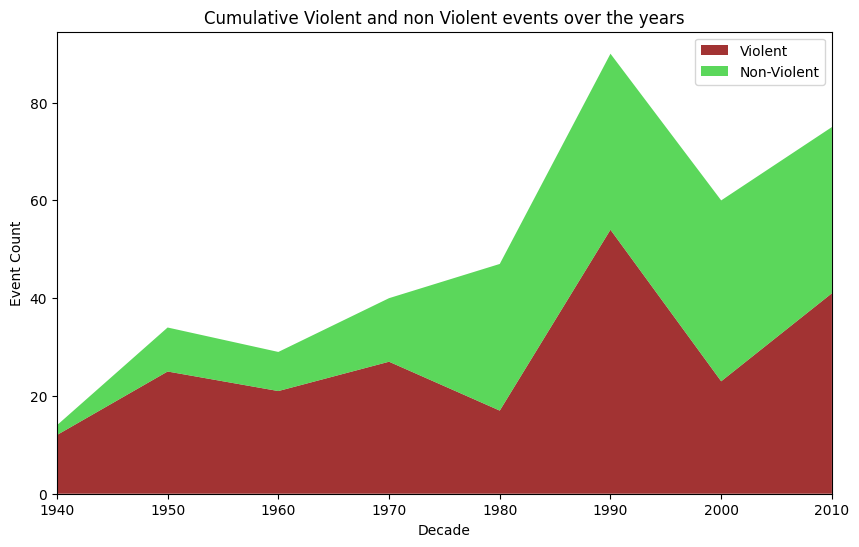

In [13]:
plt.figure(figsize=(10, 6))
plt.stackplot(
    violent_data.index, [violent_data, non_violent_data],
    labels=['Violent', 'Non-Violent'],
    colors=['darkred', 'limegreen'],
    alpha=0.8
)
plt.xlabel('Decade')
plt.ylabel('Event Count')
plt.title('Cumulative Violent and non Violent events over the years')
plt.legend()
plt.xlim(1940, 2010)
plt.show()

>Create a plot showing, for each decade from 1940 onwards, the number of nonviolent campaigns and the percentage of success. Your plot will have two vertical axes, one for each of the metrics.

* To achieve this, we first need to keep the number of succesful non-violent campaigns.

In [18]:
successful_nonviolent_data = rounded_down_data[(rounded_down_data['Not Violent'] == 1) & (navco_data['SUCCESS'] == 1)]
decade_counts = successful_nonviolent_data.groupby('Year')['ID'].count().reset_index()
decade_counts.columns = ['Year', 'Successful Events']
decade_counts

,Year,Successful Events
0,1940,1
1,1950,2
2,1960,2
3,1970,7
4,1980,14
5,1990,30
6,2000,25
7,2010,13


* And keep them together with the number of non violent events in total, to divide:

In [15]:
non_violent_data = non_violent_data.reset_index()  # Resetting index to make 'Year' a column
non_violent_with_success = pd.merge(non_violent_data, decade_counts, on='Year', how='left')

non_violent_with_success

,Year,Not Violent,Successful Events
0,1940,2,1
1,1950,9,2
2,1960,8,2
3,1970,13,7
4,1980,30,14
5,1990,36,30
6,2000,37,25
7,2010,34,13


* So we calculate the percentage of success per decade:

In [16]:
non_violent_with_success['Percentage of Success'] = non_violent_with_success['Successful Events'] / non_violent_with_success['Not Violent']
non_violent_with_success

,Year,Not Violent,Successful Events,Percentage of Success
0,1940,2,1,0.500000
1,1950,9,2,0.222222
2,1960,8,2,0.250000
3,1970,13,7,0.538462
4,1980,30,14,0.466667
5,1990,36,30,0.833333
6,2000,37,25,0.675676
7,2010,34,13,0.382353


* Now we can plot our data.

* We use a twin axis plot, meaning that there are 2 different *y axes* on the same *x axis*. 
* The y axis on the left shows the number of non-violent campaigns per decade.
* The y axis on the right shows a percentage of successful non-violent campaigns per decade. 
* The bars are color coded and match with the color they share with the axis.

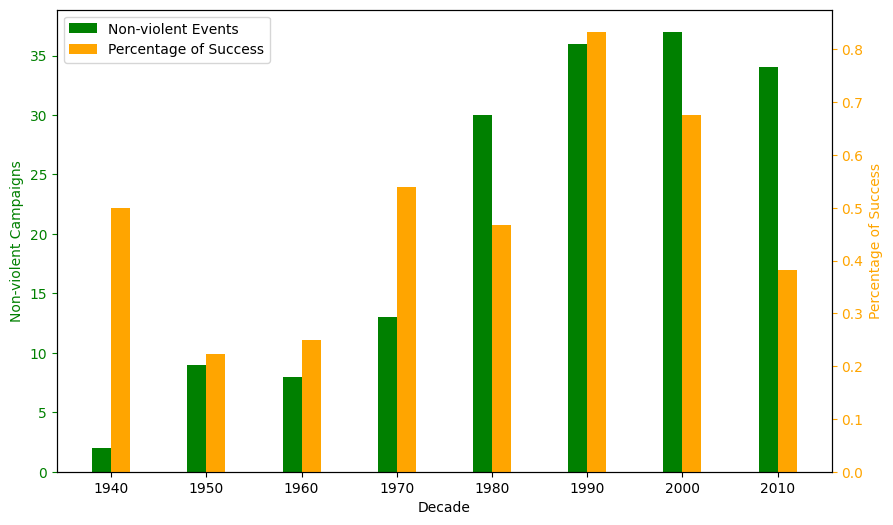

In [17]:
fig, ax1 = plt.subplots(figsize=(10, 6))
bar_width = 2
bar1 = ax1.bar(non_violent_with_success['Year'] - bar_width/2, non_violent_with_success['Not Violent'], bar_width, label='Non-violent Events', color='green')
#set labels & ticks for 1 axis
ax1.set_xlabel('Decade')
ax1.set_ylabel('Non-violent Campaigns', color='green')
ax1.tick_params('y', colors='green')
#create 2nd axis
ax2 = ax1.twinx()
bar2 = ax2.bar(non_violent_with_success['Year'] + bar_width/2, non_violent_with_success['Percentage of Success'], bar_width, label='Percentage of Success', color='orange')
#set labels & ticks for 2nd
ax2.set_ylabel('Percentage of Success', color='orange')
ax2.tick_params('y', colors='orange')
#combine legend
bars = [bar1, bar2]
labels = [bar.get_label() for bar in bars]
ax1.legend(bars, labels, loc='upper left')

_ = plt.show()

>Create a plot showing the success rate for violent and nonviolent campaigns by decade.

* We need to find the succes rate for violent campaigns the same way we did for non-violent ones.

In [19]:
successful_violent_data = rounded_down_data[(rounded_down_data['Violent'] == 1) & (navco_data['SUCCESS'] == 1)]
decade_counts = successful_violent_data.groupby('Year')['ID'].count().reset_index()
decade_counts.columns = ['Year', 'Successful Events']
violent_data = violent_data.reset_index()#reset index to make Year a column
violent_with_success = pd.merge(violent_data, decade_counts, on='Year', how='left')
violent_with_success

,Year,Violent,Successful Events
0,1940,12,6
1,1950,25,8
2,1960,21,4
3,1970,27,12
4,1980,17,5
5,1990,54,15
6,2000,23,3
7,2010,41,3


In [20]:
violent_with_success['Percentage of Success'] = violent_with_success['Successful Events'] / violent_with_success['Violent']
violent_with_success

,Year,Violent,Successful Events,Percentage of Success
0,1940,12,6,0.500000
1,1950,25,8,0.320000
2,1960,21,4,0.190476
3,1970,27,12,0.444444
4,1980,17,5,0.294118
5,1990,54,15,0.277778
6,2000,23,3,0.130435
7,2010,41,3,0.073171


* Now that we have that, for convenience's sake we can put both success rates on a single data frame:

In [21]:
success_rates = pd.DataFrame({
    'Year': violent_with_success['Year'],
    'Violent Success Rate': violent_with_success['Percentage of Success'],
    'Non-Violent Success Rate': non_violent_with_success['Percentage of Success']
})
success_rates

,Year,Violent Success Rate,Non-Violent Success Rate
0,1940,0.500000,0.500000
1,1950,0.320000,0.222222
2,1960,0.190476,0.250000
3,1970,0.444444,0.538462
4,1980,0.294118,0.466667
5,1990,0.277778,0.833333
6,2000,0.130435,0.675676
7,2010,0.073171,0.382353


* And we can plot our data through there.
* The following graph depicts the success rate of both violent and non-violent campaigns side by side, over the years.

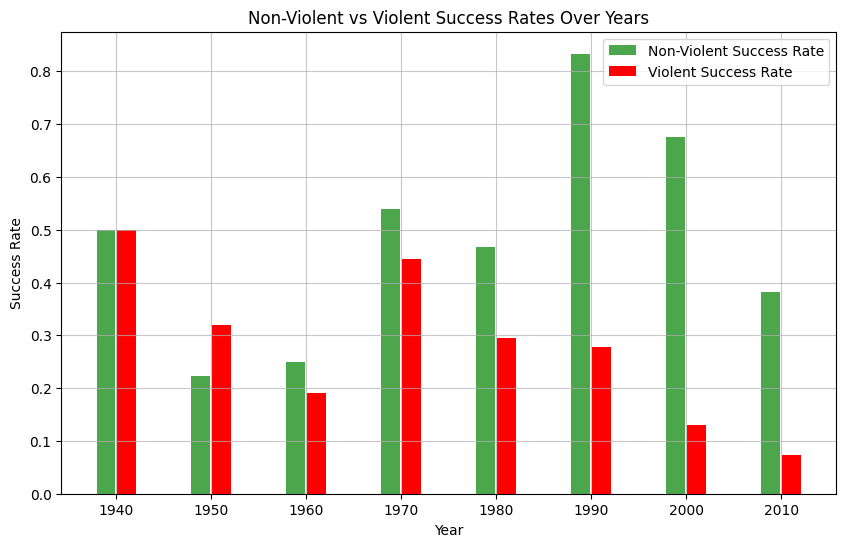

In [23]:
# Plotting
plt.figure(figsize=(10, 6))
#for beauty
bar_width = 2
gap = 0.2
#nonviolent
plt.bar(success_rates['Year'], success_rates['Non-Violent Success Rate'], width=bar_width, color='green', label='Non-Violent Success Rate', alpha=0.7)
#violent
plt.bar(success_rates['Year'] + bar_width + gap, success_rates['Violent Success Rate'], width=bar_width, color='red', label='Violent Success Rate')
#labels & title
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.title('Non-Violent vs Violent Success Rates Over Years')
plt.legend()
#manual ticks
tick_positions = success_rates['Year'] + bar_width / 2 + gap / 2
plt.xticks(tick_positions, success_rates['Year'])
#grid
plt.grid(True, linestyle='-', alpha=0.7)

_ = plt.show()